# Review of classical electronic structure methods 

In order to assess the performance of quantum computing algorithms in addressing the electronic structure problem, we will briefly review a few commonly employed classical electronic structure methods of varying level of approximation. 

## Hartree-Fock

The Hartree-Fock (HF) method employs a **mean-field approximation**, where Coulomb correlation of electrons is neglected. The HF wavefunction is hence restricted to the form of a single Slater determinant, for which the optimal form may be acquired by an optimization of the underlying single particle basis (orbitals). Once the optimal HF orbitals have been found, the HF state may be written as 

$$ | \text{HF} \rangle = \prod_{p \in \text{occ}} \hat a^\dagger_p | \text{vac} \rangle $$

where $\hat a^\dagger_p$ creates an electron in the $p^{\rm{th}}$ optimized HF spin orbital, and  $| \text{vac} \rangle$ is the vacuum state (all spin-orbitals unoccupied). Due to the restriction to a single Slater determinant, the HF energy may be obtained very efficiently and can be applied to very large molecules, however it becomes qualitatively incorrect when **electronic correlations** become sufficiently strong. The HF wavefunction is often used as a starting point in more accurate treatments of electronic correlation. 

## Coupled cluster

The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators

$$|\text{CC} \rangle = e^{\hat T} | \text{HF}\rangle, \quad \hat T = \hat T_1 + \hat T_2 + ...$$

where $\hat T_1 = \sum_{ia} t^{a}_i \hat a^\dagger_a \hat a_i$ are referred to as 'singles', $\hat T_2 = \sum_{ijab} t^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j$ as 'doubles', etc. When the excitation rank is truncated to only singles (S) and doubles (D), $\hat T = \hat T_1 + \hat T_2$, the corresponding ansatz is referred to as CCSD. Since the number of possible single and double excitations for a system of $N$ electrons in $M$ orbitals is polynomial in $M$, one can efficiently solve a system of equations to obtain the optimized CCSD amplitudes. CCSD often gives accurate energies and can be applied to modestly sized chemical systems. However, due to its implementation, it can **violate the variational principle** and give energies lower than the ground state.

## Full Configuration Interaction
The full configuration interaction (FCI) method yields the **exact ground state energy** within a given basis set. The FCI wavefunction is written as a linear combination of all possible $N$-particle Slater determinants over the orbital basis
$$|\text{FCI} \rangle =  \left( \sum_{ia} C^{a}_i \hat a^\dagger_a \hat a_i + \sum_{ijab} C^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j + ...  \right) | \text{HF} \rangle $$
where the sum includes up to $N$-electron excitations, and hence there are an exponential number of coefficients to optimize in $| \text{FCI} \rangle$. Due to its **exponential complexity**, FCI is often reserved for only the smallest chemical systems. However, it serves as a useful result to compare to when assessing tractable electronic structure methods.

# Benchmarking for electronic PESs in minimal basis (STO-3G)

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES

bond_lengths = np.linspace(0.4,3.4,10)
molecules=['h2','h2o','lih','n2','h4','nh3']
methods=['hf','cisd','ccsd','fci']
basies=['sto-3g','6-31g']

molecule='lih'
basis ='6-31g'
basis = 'sto-3g'


In [2]:
molecule=molecules[np.random.randint(len(molecules))]
basis=basies[np.random.randint(len(basies))]

molecule='lih'
basis = 'sto-3g'

print("Calculations for ",molecule.upper()," in basis:",basis.upper())

Calculations for  LIH  in basis: STO-3G


In [3]:
#Run HF
%time HF_PES = obtain_PES(molecule, bond_lengths, basis,  method='hf')

r=0.4000, E =  -6.61032 Eh
r=0.7333, E =  -7.53461 Eh
r=1.0667, E =  -7.79688 Eh
r=1.4000, E =  -7.86062 Eh
r=1.7333, E =  -7.85509 Eh
r=2.0667, E =  -7.82366 Eh
r=2.4000, E =  -7.78349 Eh
r=2.7333, E =  -7.74214 Eh
r=3.0667, E =  -7.70361 Eh
r=3.4000, E =  -7.67020 Eh
CPU times: user 11.7 s, sys: 139 ms, total: 11.9 s
Wall time: 12.2 s


In [4]:
#Run CISD
%time CISD_PES = obtain_PES(molecule, bond_lengths, basis,  method='cisd')

r=0.4000, E =  -6.63979 Eh
r=0.7333, E =  -7.55340 Eh
r=1.0667, E =  -7.81365 Eh
r=1.4000, E =  -7.87844 Eh
r=1.7333, E =  -7.87797 Eh
r=2.0667, E =  -7.85601 Eh
r=2.4000, E =  -7.83059 Eh
r=2.7333, E =  -7.80993 Eh
r=3.0667, E =  -7.79666 Eh
r=3.4000, E =  -7.78938 Eh
CPU times: user 6.58 s, sys: 164 ms, total: 6.75 s
Wall time: 6.78 s


In [5]:
#Run CCSD
%time CCSD_PES = obtain_PES(molecule, bond_lengths, basis,  method='ccsd')

r=0.4000, E =  -6.64011 Eh
r=0.7333, E =  -7.55341 Eh
r=1.0667, E =  -7.81366 Eh
r=1.4000, E =  -7.87844 Eh
r=1.7333, E =  -7.87797 Eh
r=2.0667, E =  -7.85602 Eh
r=2.4000, E =  -7.83060 Eh
r=2.7333, E =  -7.80995 Eh
r=3.0667, E =  -7.79667 Eh
r=3.4000, E =  -7.78939 Eh
CPU times: user 7.36 s, sys: 1.16 s, total: 8.51 s
Wall time: 10.3 s


In [6]:
#Run FCI
%time FCI_PES = obtain_PES(molecule, bond_lengths, basis, method='fci')

r=0.4000, E =  -6.64028 Eh
r=0.7333, E =  -7.55342 Eh
r=1.0667, E =  -7.81366 Eh
r=1.4000, E =  -7.87845 Eh
r=1.7333, E =  -7.87799 Eh
r=2.0667, E =  -7.85604 Eh
r=2.4000, E =  -7.83063 Eh
r=2.7333, E =  -7.81000 Eh
r=3.0667, E =  -7.79675 Eh
r=3.4000, E =  -7.78950 Eh
CPU times: user 6.6 s, sys: 132 ms, total: 6.73 s
Wall time: 6.77 s


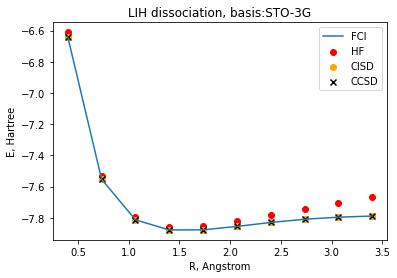

In [7]:
#Plot the PESs

title_text=molecule.upper()+' dissociation, basis:'+basis.upper()
plt.title(title_text)
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='r')
plt.scatter(bond_lengths, CCSD_PES, label='CISD', marker='o',color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD',  marker='x', color='k')
plt.legend()